### Overview

Pre-processing:
- Calibration

Image pipeline:
- Distortion correction
- Create binary image (gradients, colors, masks, etc)
- Perspective transform
- Pick out the lane lines
- Determine curvature
- Transform boundaries back to original image

In [125]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import cv2
import random

### Calibration

In [127]:
"""
For each file, look for corners. If found, save image and corners.
Object points explanation here: https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/a30f45cb-c1c0-482c-8e78-a26604841ec0
"""
def calibrate(directory=''):
    objp = np.zeros((9*6,3),np.float32)
    objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

    pathname = directory + '/*.jpg'
    fnames = glob.glob(pathname)
    objpoints = []
    imgpoints = []
    ret_images = []
    for fname in fnames:
        img = mpimg.imread(fname)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
        if ret == True:
            imgpoints.append(corners)
            ret_images.append(img)
            objpoints.append(objp)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
        objpoints, imgpoints, gray.shape[::-1],None,None)
    return mtx, dist

In [129]:
"""
Calibrate the camera
"""
calibrate_camera('camera_cal')

### Visualize images

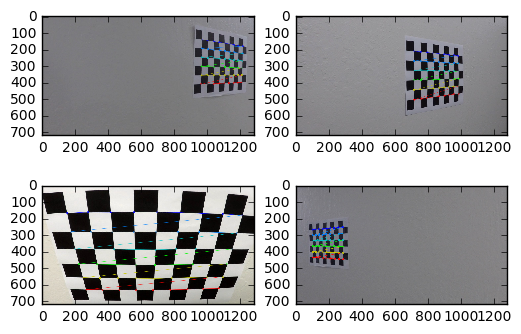

In [130]:
"""
Four random images before undistortion, with corners drawn
"""
for a in range(1,5):
    i = random.randint(0, len(ret_images)-1)
    
    img_drawn = np.copy(ret_images[i])
#     img_drawn = np.empty_like(ret_images[i])
#     img_drawn[:] = ret_images[i]
    
    corners = imgpoints[i]
    
    plt.subplot(2,2,a)
    img_drawn = cv2.drawChessboardCorners(img_drawn, (9,6), corners, True)
    plt.imshow(img_drawn)

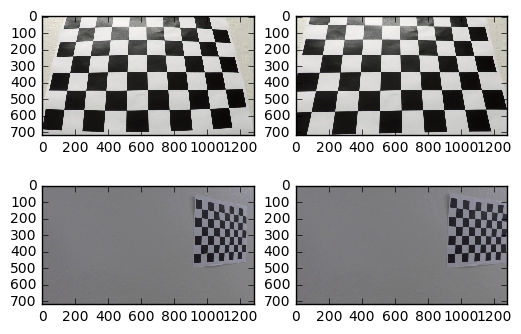

In [131]:
"""
Draw before and after undistortion for 2 images at random
"""
for a in range(1,4,2):
    i = random.randint(0, len(ret_images)-1)
    img = ret_images[i]
    
    plt.subplot(2,2,a)
    plt.imshow(img)
    
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    
    plt.subplot(2,2,a+1)
    plt.imshow(dst)

In [ ]:
def process_video():
    get_frame()
    
    if(fail_count > max_fail):
        locked = False
        fail_count = 0
        
    if(locked):
        smart_search()
        if(sanity_check()):
            update_line()
        else:
            use last frame
            update fail count
    else:
        blind_search()